<a href="https://colab.research.google.com/github/Fliptoss/ML_stuff/blob/main/californai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Initial Setup
### Dimentionality Reduction (PCA)
### Preprocessing / Scaling
### Categorical Encoding (Dummy / One-Hot)
### Binning (Grouping, Aggregating)
### Clustering
### Feature Selection (Combinations of Features)

In [2]:
!pip install kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riptideit","key":"98620d95ed8fbbc89f16f4fb3e44ad51"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d camnugent/california-housing-prices
!unzip california-housing-prices.zip

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [6]:
import pandas as pd

df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
df = df.dropna()

In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
# Seperate into Train and Test DataFrames
df = df.sample(frac=1, random_state = 2) #this suffles the rows
train_df = df[:17000]
train_df = train_df.reset_index(drop=True)
test_df = df[17000:]
test_df = test_df.reset_index(drop=True)

In [13]:
train_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-121.58,39.16,33.0,1897.0,378.0,888.0,385.0,2.1111,68700.0,INLAND
1,-118.12,34.14,52.0,2337.0,352.0,981.0,328.0,5.8692,490400.0,<1H OCEAN
2,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,306300.0,NEAR BAY
3,-122.19,37.74,36.0,847.0,212.0,567.0,159.0,1.1765,87100.0,NEAR BAY
4,-121.23,37.96,44.0,2204.0,473.0,1277.0,435.0,1.5539,59200.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16995,-122.56,37.98,36.0,2649.0,542.0,1111.0,557.0,4.8056,345700.0,NEAR BAY
16996,-122.47,37.76,49.0,2842.0,670.0,1396.0,648.0,3.2679,345700.0,NEAR BAY
16997,-117.23,32.75,11.0,4304.0,1245.0,1960.0,1105.0,3.3456,159800.0,NEAR OCEAN
16998,-118.35,34.32,52.0,102.0,29.0,54.0,32.0,1.9875,191700.0,<1H OCEAN


In [14]:
test_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
3428,-117.62,33.43,27.0,3858.0,1062.0,2321.0,873.0,3.3155,231000.0,NEAR OCEAN
3429,-118.30,34.09,40.0,3058.0,1215.0,3953.0,1223.0,1.8156,218800.0,<1H OCEAN
3430,-119.95,38.95,22.0,1058.0,352.0,851.0,269.0,2.0200,87500.0,INLAND
3431,-119.73,36.83,14.0,3348.0,491.0,1584.0,493.0,5.0828,111400.0,INLAND


In [17]:
# Get observed outputs for train and test
y_train = train_df['median_house_value'].to_numpy()
y_test = test_df['median_house_value'].to_numpy()

y_train.shape, y_test.shape

((17000,), (3433,))

In [18]:
# Get error of baseline model that uses the average median_house_value in train_df

from sklearn.metrics import mean_absolute_error

average_median_house_value = train_df['median_house_value'].mean()
baseline_model_test_predictions = [average_median_house_value] * len(test_df)

#mean absolute error
mean_absolute_error(y_test, baseline_model_test_predictions)

90333.831769298

### 1. Dimensionality Reduction (PCA)

In [20]:
# Observe correlation between total_rooms, total_bedrooms and households

train_df[['total_rooms', 'total_bedrooms', 'households']].corr()

,total_rooms,total_bedrooms,households
total_rooms,1.000000,0.929633,0.918357
total_bedrooms,0.929633,1.000000,0.979655
households,0.918357,0.979655,1.000000


In [22]:
# Get X_train_3 which has total_rooms, total_bedrooms and households as input

import numpy as np

X_train_3 = train_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_train_3.shape

(17000, 3)

In [23]:
# Get X_test_3 which has total_rooms, total_bedrooms and households as input

X_test_3 = test_df[['total_rooms', 'total_bedrooms', 'households']].to_numpy()

X_test_3.shape

(3433, 3)

In [24]:
# Get error of random forest training on just (X_train_3, y_train) and testing on (X_test_3, y_test)

from sklearn.ensemble import RandomForestRegressor

forest_base = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3, y_train)
forest_base_test_predictions = forest_base.predict(X_test_3)

mean_absolute_error(y_test, forest_base_test_predictions)

80238.39398011014

In [26]:
# Train PCS (Linear Dimensionality Reduction) with 2-features output

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(X_train_3)

pca

PCA(n_components=2)

In [27]:
from re import X
# Use PCA to transform X_train_3 and X_test_3 into X_train_pca and X_test_pca

X_train_pca = pca.transform(X_train_3)
X_test_pca = pca.transform(X_test_3)

X_train_pca.shape, X_test_pca.shape

((17000, 2), (3433, 2))

In [28]:
forest_pca = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_pca, y_train)
forest_pca_test_predictions = forest_pca.predict(X_test_pca)

mean_absolute_error(y_test, forest_pca_test_predictions)

78333.12039045783

### 2. Preprocessing / Scaling

In [29]:
X_train_3

array([[1897.,  378.,  385.],
       [2337.,  352.,  328.],
       [1705.,  246.,  253.],
       ...,
       [4304., 1245., 1105.],
       [ 102.,   29.,   32.],
       [1266.,  228.,  239.]])

(array([1.4433e+04, 2.1200e+03, 2.9700e+02, 8.0000e+01, 4.1000e+01,
        1.4000e+01, 6.0000e+00, 5.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

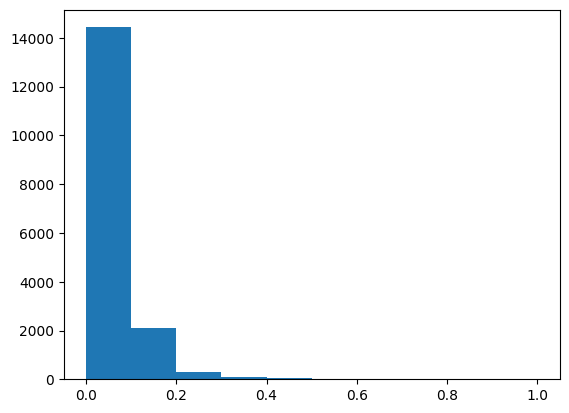

In [35]:
# test different preporcessing functions on X_train_3

from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
import matplotlib.pyplot as plt

scaler = MinMaxScaler().fit(X_train_3)
X_train_3_scaled = scaler.transform(X_train_3)

plt.hist(X_train_3_scaled[:,0])

In [33]:
# Preprocessing X_test_3
X_test_3_scaled = scaler.transform(X_test_3)

X_test_3_scaled.shape

(3433, 3)

In [37]:
random_forest_scaled = RandomForestRegressor(n_estimators=50, max_depth=5).fit(X_train_3_scaled, y_train)
random_forest_scaled_test_predictions = random_forest_scaled.predict(X_test_3_scaled)

mean_absolute_error(y_test, random_forest_scaled_test_predictions)

80110.62669308398

In [41]:
# Create Pipeline of Standardization -> PCA -> RandomForest

from sklearn.pipeline import Pipeline

scale_pca_pipe_forest = Pipeline(steps=[('Scaler', Normalizer()),
                                       ('PCA', PCA(n_components=2)),
                                       ('Forest', RandomForestRegressor(n_estimators=50, max_depth=5))])

scale_pca_pipe_forest

Pipeline(steps=[('Scaler', Normalizer()), ('PCA', PCA(n_components=2)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [42]:
# Get error of Standardization -> PCA -> RandomForest

scale_pca_pipe_forest.fit(X_train_3, y_train)
scale_pca_pipe_forest_test_predictions = scale_pca_pipe_forest.predict(X_test_3)

mean_absolute_error(y_test, scale_pca_pipe_forest_test_predictions)

76665.46976235208

### 3. Categorical Encoding (Dummy / One-Hot)

In [43]:
# Get dummy varaibles (one-hot encoding) for the training set
# we do not use this for words because they have similarities .
# for word we do word embedding

train_dummies = pd.get_dummies(train_df['ocean_proximity'])
train_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,True,False,False,False
1,True,False,False,False,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,True,False,False,False


In [44]:
train_df = pd.concat([train_df, train_dummies], axis=1)
train_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-121.58,39.16,33.0,1897.0,378.0,888.0,385.0,2.1111,68700.0,INLAND,False,True,False,False,False
1,-118.12,34.14,52.0,2337.0,352.0,981.0,328.0,5.8692,490400.0,<1H OCEAN,True,False,False,False,False
2,-122.23,37.76,52.0,1705.0,246.0,658.0,253.0,5.7500,306300.0,NEAR BAY,False,False,False,True,False
3,-122.19,37.74,36.0,847.0,212.0,567.0,159.0,1.1765,87100.0,NEAR BAY,False,False,False,True,False
4,-121.23,37.96,44.0,2204.0,473.0,1277.0,435.0,1.5539,59200.0,INLAND,False,True,False,False,False


In [45]:
train_df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,7522
INLAND,5406
NEAR OCEAN,2168
NEAR BAY,1900
ISLAND,4


In [57]:
# Get dummies varaibles
test_dummies = pd.get_dummies(test_df['ocean_proximity'])
test_dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,True,False,False,False,False
1,True,False,False,False,False
2,True,False,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False


In [59]:
# append the dummies and drop ISLAND on the test DataFrame
test_df = pd.concat([test_df, test_dummies], axis=1)
test_df = test_df.drop('ISLAND', axis=1)
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,500001.0,<1H OCEAN,True,False,False,False,True,False,False,False
1,-121.69,36.81,18.0,2837.0,522.0,1454.0,458.0,4.5272,221000.0,<1H OCEAN,True,False,False,False,True,False,False,False
2,-118.28,34.05,41.0,1075.0,597.0,2260.0,614.0,1.3000,162500.0,<1H OCEAN,True,False,False,False,True,False,False,False
3,-123.11,39.32,20.0,2745.0,504.0,1421.0,430.0,3.3431,137500.0,INLAND,False,True,False,False,False,True,False,False
4,-118.42,33.96,44.0,1282.0,216.0,494.0,209.0,5.6180,365900.0,<1H OCEAN,True,False,False,False,True,False,False,False
